In [101]:
import tweepy 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import preprocessor as p
import re
import functools
import operator
from wordcloud import WordCloud
from PIL import Image

#initializing the twitter credentials 
creds = pd.read_csv("twitter_creds.csv",header=None, names=('label','key'))
consumer_key = creds.at[0,'key']
consumer_secret = creds.at[1,'key']
access_key = creds.at[2,'key']
access_secret = creds.at[3,'key']

In [91]:
def get_tweets(screen_name):
    #authorize twitter, initialize tweepy
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)
    
    tweets = []
    
    #make initial request for most recent tweets (200 is the maximum allowed count)
    new_tweets = api.user_timeline(screen_name = screen_name,count=200)

    #save most recent tweets
    tweets.extend(new_tweets)

    #save the id of the oldest tweet less one
    oldest = tweets[-1].id - 1
    
    while len(new_tweets) > 0:
        #print ("getting tweets before %s" % (oldest))
        #all subsiquent requests use the max_id param to prevent duplicates
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)
        #save most recent tweets
        tweets.extend(new_tweets)
        #update the id of the oldest tweet less one
        oldest = tweets[-1].id - 1
        
    outtweets = [tweet.text for tweet in tweets]
    
    return outtweets

In [142]:
if __name__ == '__main__':
    tweets = get_tweets('narendramodi')
    clean_tweets = [p.clean(tweet) for tweet in tweets]
    hashtags_tweets = [re.findall(r'#(\w+)', tweet) for tweet in tweets]
    mention_tweets = [re.findall(r'@(\w+)', tweet) for tweet in tweets]
    all_hashtags = functools.reduce(operator.iconcat, hashtags_tweets, [])
    all_metion = functools.reduce(operator.iconcat, mention_tweets, [])

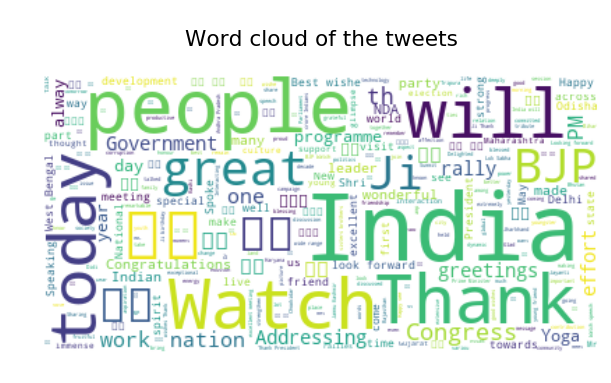

In [143]:
wc = WordCloud(background_color="white", max_words=3000)
text =' '.join(clean_tweets)
wc.generate(text)

plt.rcParams.update({'font.size': 15})
plt.rcParams["figure.figsize"] = (10,10)
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("\nWord cloud of the tweets\n")
plt.show()

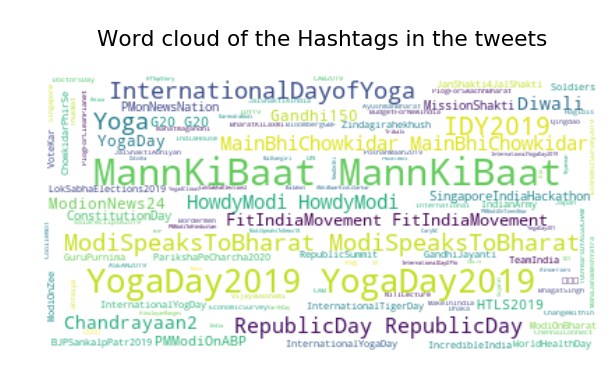

In [144]:
hashtags_string = ' '.join(all_hashtags)
wc.generate(hashtags_string)

plt.rcParams.update({'font.size': 15})
plt.rcParams["figure.figsize"] = (10,10)
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("\nWord cloud of the Hashtags in the tweets\n")
plt.show()

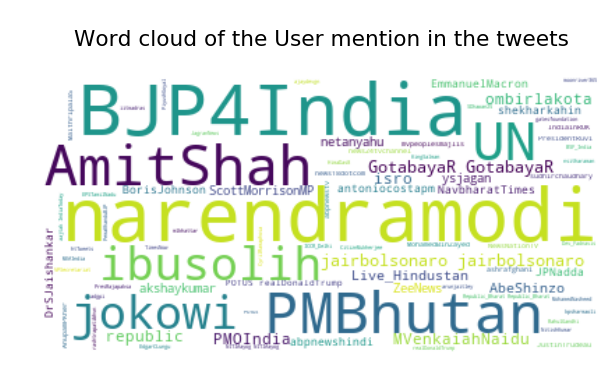

In [145]:
mention_string = ' '.join(all_metion)
wc.generate(mention_string)

plt.rcParams.update({'font.size': 15})
plt.rcParams["figure.figsize"] = (10,10)
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.title("\nWord cloud of the User mention in the tweets\n")
plt.axis("off")
plt.show()